**Eman Ebrahim**

**Task 2**

**DS & BA Function intern at Sparks Foundation**

**Prediction using Unsupervised ML**

***Import required libraries***

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


***Read the data***

In [5]:
ds = pd.read_csv("Iris.csv")

In [6]:
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
#from info there isn't null values in all columns 
##check for duplicates 
print('Number of duplicate rows:', ds.duplicated().sum())

Number of duplicate rows: 0


In [14]:
##we don't need id column so I'll drop it
ds.drop('Id',axis=1,inplace=True)
ds.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
##check for duplicates after drop id column 
print('Number of duplicate rows after dropping id column:', ds.duplicated().sum())

Number of duplicate rows after dropping id column: 3


In [18]:
#drop duplicated rows 
ds.drop_duplicates(inplace=True)
ds.shape[0]

147

***Determining the optimum number of clusters using the elbow method***

In [19]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
x = ds.iloc[:, [0, 1, 2, 3]].values
w = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    w.append(kmeans.inertia_)

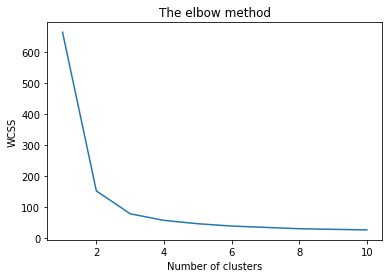

In [20]:
# Plotting the results
plt.plot(range(1, 11), w)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

***Applying Kmeans to the dataset with optimum number of clusters***

In [22]:
k_m = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
pred_km = k_m.fit_predict(x)

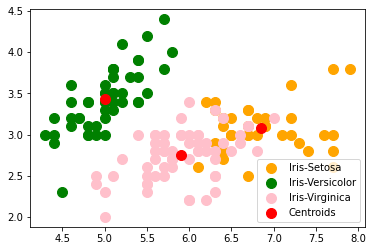

In [25]:
plt.scatter(x[pred_km == 0, 0], x[pred_km == 0, 1], s = 100, c = 'orange', label = 'Iris-Setosa')
plt.scatter(x[pred_km == 1, 0], x[pred_km == 1, 1], s = 100, c = 'green', label = 'Iris-Versicolor')
plt.scatter(x[pred_km == 2, 0], x[pred_km == 2, 1], s = 100, c = 'pink', label = 'Iris-Virginica')

#Plotting the centroids of the clusters
plt.scatter(k_m.cluster_centers_[:, 0], k_m.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

***Labeling the predictions***

In [27]:
pred_km = np.where(pred_km== 0, 'Iris-setosa', pred_km) #consedring 0 to iris_setosa
pred_km = np.where(pred_km=='1', 'Iris-versicolour', pred_km) #1 to iris_versicolour
pred_km = np.where(pred_km=='2', 'Iris-virginica', pred_km) #2 to iris_virginica

***Adding the prediction to the dataset***

In [28]:
data_with_clusters = ds.copy()
data_with_clusters["Cluster"] = pred_km
print(data_with_clusters.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

            Cluster  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


***Data visualization***

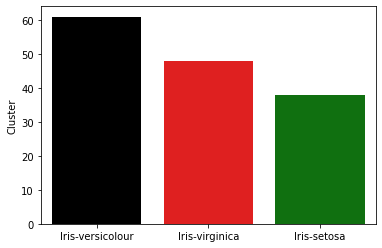

In [30]:
import seaborn as sns
# Bar plot
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["black", "red", "green"]));

***Bar plot said that***
There are around 62 iris-versicolour , 50 Iris-virginica and 38 Iris-setosa samples in the dataset as predicted.

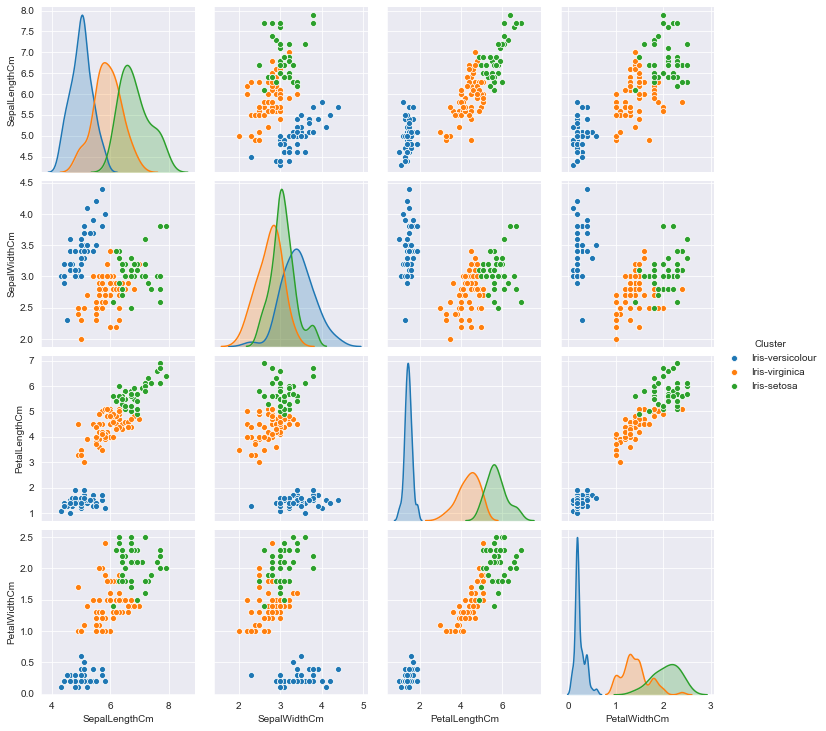

In [32]:
#Pair Plot
sns.set_style('darkgrid')
sns.pairplot(data_with_clusters,hue = 'Cluster'); 

***Pairs Plot Insights***

- Iris-Setosa seems to have smaller petal length and petal width as compared to others.
- 